# Ejemplo de análisis completo: clasificación de cáncer de mama como maligno o benigno

El Dataset breast_cancer es otro de los conjuntos de datos disponibles libremente y es de uso extendido en la comunidad científica. 

Se trata de un conjunto formado por 569 muestras, una dimensionalidad de 30 (variables de entrada) y dos clases como salida: maligno y benigno.

En primer lugar, cargaremos el conjunto de datos para poder trabajar con él: aprendizaje, clasificación y evaluación:


In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_breast_cancer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import Lasso
import lightgbm as lgb

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay, plot_roc_curve
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, log_loss, roc_auc_score)
import seaborn as sns

# 1. Cargamos los datos
data = load_breast_cancer()


## Análisis del dataset

Organizamos los datos en un DataFrame, y nos servirá para mostrarlos de una forma más interpretable por pantalla:

In [ ]:
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Antes de la aplicación de algoritmos, puede resultar de gran utilidad, para la interpretación de datos y una evaluación posterior, representar gráficamente los ejemplos de acuerdo con el valor de diversas variables. Para esto utilizaremos la función *pairplot* de la librería seaborn. Puedes encontrar información en el siguiente enlace:

https://seaborn.pydata.org/generated/seaborn.pairplot.html


<Figure size 1440x864 with 0 Axes>

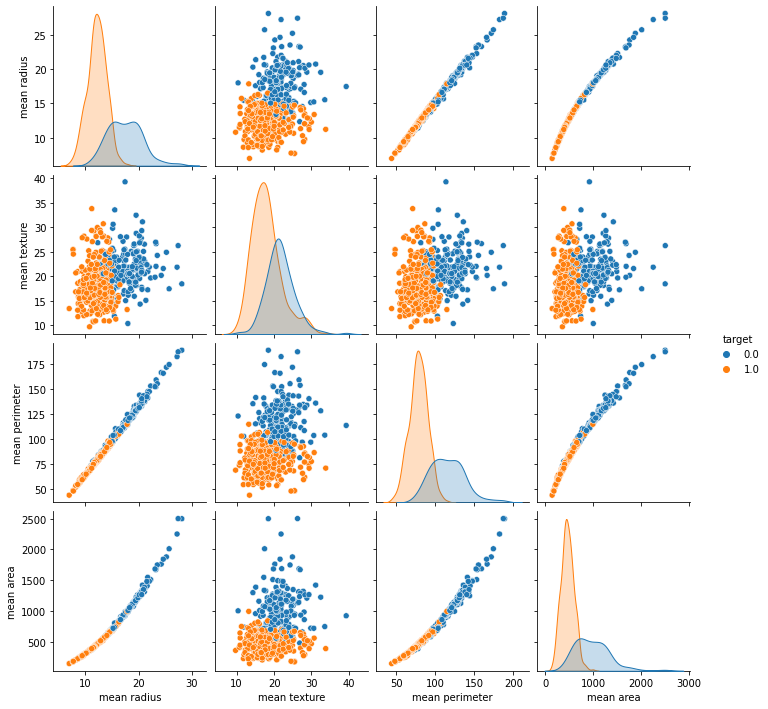

<Figure size 1440x864 with 0 Axes>

In [ ]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture','mean perimeter', 'mean area'])
# mapa de correlación entre variables
plt.figure(figsize=(20, 12))

La anterior figura corresponde a una gráfica bidimensional donde se aprecia la
distribución de muestras (casos de cáncer) y su distribución de acuerdo con el valor
de dos variables. En este caso particular se han tomado las cuatro primeras variables
de las treinta que presenta el conjunto de datos. Fíjese también como las muestras
pertenecientes a la clase “Maligno” (1.0) están coloreadas de naranja, mientras que
las que pertenecen a la clase “Benigno” (0.0) lo están de color azul. En la representación,
a simple vista, se aprecia que, en general, hay una diferencia clara entre
las muestras de ambas clases en base al valor de las variables elegidas, a excepción
de la frontera entre ambas donde puede haber un mayor número de casos conflictivos que den lugar a errores puntuales en el proceso de clasificación. En general, los
métodos de aprendizaje y clasificación empleados para este Dataset deberían generar
un modelo que arrojase resultados por encima del 90% dada una separación tan
clara.

También mostraré la matriz de correlación de todas las variables, de esta forma se puede ver qué variables infuyen más en la clase a predecir.

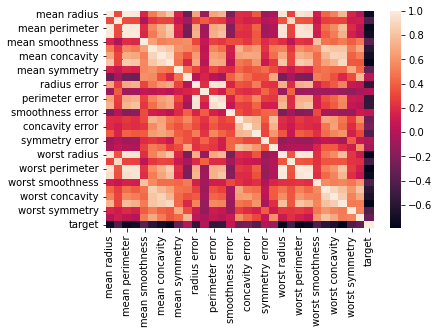

In [ ]:
sns.heatmap(df.corr(), annot=False) #annot es False por el pequeño tamaño del gráfico

La matriz de correlación resultante muestra la correlación de todas las variables con todas las variables. La correlación es un valor indicativo de la asociación entre dos variables.
Dos variables están asociadas cuando el valor de una nos da información acerca de
la otra. El valor de correlación o magnitud está comprendido entre -1 y 1; cuando
el valor de correlación entre dos variables es positivo, se denomina correlación positiva
y las dos variables se correlacionan en el mismo sentido o sentido directo:
si el valor de una variable crece o decrece, la otra variable lo hace con el mismo
comportamiento. En cambio, cuando el valor de correlación es negativo, hablamos
de una correlación negativa en donde las variables se correlacionan en sentido inverso:
cuando el valor de una variable crece el de la otra decrece, y viceversa. Si
la magnitud de correlación es 1 hablamos de correlación positiva perfecta y supone
una determinación absoluta entre las dos variables (en sentido directo). En el caso
de que el valor sea -1 hablamos de correlación negativa perfecta (en sentido inverso).
Finalmente, si el valor es 0, se dice que las variables están incorrelacionadas,
es decir, no se puede establecer ningún sentido en la covariación.

Otra de las formas de tener una mayor comprensión del conjunto de datos es una representación gráfica del número de muestras por clase. 

In [ ]:
# Cantidad de elementos de cada Clase
print(df['target'].value_counts())

1.0    357
0.0    212
Name: target, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


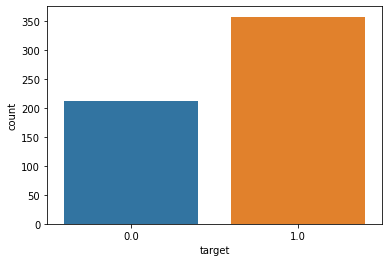

In [ ]:
# Representación gráfica de la cantidad de elementos de cada clase
sns.countplot(df['target'])

Posterior a esta fase inicial, de preparación, cargamos el conjunto de datos en
variables que posteriormente podamos manipular, y que son fundamentales para
generar el modelo. Además, dividimos el conjunto inicial de entrada en dos subconjuntos:
entrenamiento (70% de muestras) y prueba (30 %).

In [ ]:
# 2. Guardamos en X las variables de entrada (propiedades que definen cada tipo de cáncer) y en y las clases Maligno y Benigno.
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
print("CLASES: " + str(data.target_names))

# Creamos conjuntos de aprendizaje y de test, dejando un 30 muestras para el aprendizaje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

CLASES: ['malignant' 'benign']


# Preprocesado de datos

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#normalización
scaler = MinMaxScaler()#se normalizará al rango [0,1]

scaler_standard = StandardScaler()

X_train = scaler_standard.fit_transform(scaler.fit_transform(X_train))                         
X_test =  scaler_standard.fit_transform(scaler.fit_transform(X_test))                  


## Definición de los modelos

Elegimos varios de los clasificadores disponibles en Scikit-learn, generamos el modelo y
hacemos la predicción con el conjunto de test (clasificación de muestras reservadas
para test)

In [ ]:
#definiremos tres clasificadores diferentes para comprobar su efectividad
classifier1 = svm.SVC(C= 0.1, gamma= 1, kernel= 'linear')
model1 = classifier1.fit(X_train, y_train)
y_pred_1 = model1.predict(X_test)


classifier2 = SVC(kernel='rbf', gamma=0.5, C=0.1)
model2 = classifier2.fit(X_train, y_train)
y_pred_2 = model2.predict(X_test)


classifier3 = lgb.LGBMClassifier()
model3= classifier3.fit(X_train,y_train)
y_pred_3 = model3.predict(X_test)

models= [model1, model2, model3]
y_preds= [y_pred_1, y_pred_2, y_pred_3]


## Evaluación de los diferentes modelos

### Matríz de confusión

Generamos la matriz de confusión a partir de las predicciones, la imprimimos
por el terminal y generamos una gráfica que la represente.

In [ ]:
for y_pred in y_preds:
  cm1 = confusion_matrix(y_test, y_pred)
  print (cm1)
  print('')


La mostraremos de forma gráfica

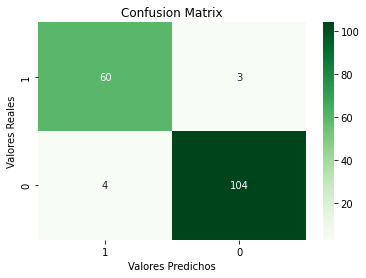

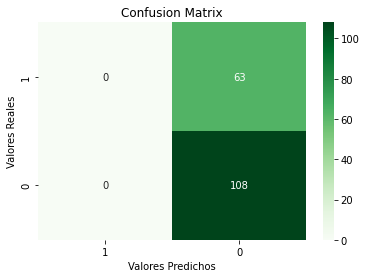

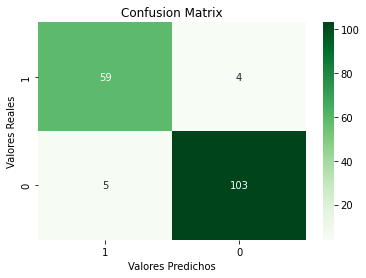

In [ ]:
for y_pred in y_preds:
  cm1 = confusion_matrix(y_test, y_pred)

  #Creación de Figura
  ax= plt.subplot()
  sns.heatmap(cm1, annot=True, ax=ax, cmap='Greens', fmt='g');
  #annot=True to annotate cells, fmt=g to disable scientific notation

  # labels, title and ticks
  ax.set_xlabel('Valores Predichos');
  ax.set_ylabel('Valores Reales');
  ax.set_title('Confusion Matrix');
  ax.xaxis.set_ticklabels([1, 0]); 
  ax.yaxis.set_ticklabels([1, 0]);
  plt.show()
  print()

### Métricas

A continuación, se aplican las métricas para realizar la evaluación del modelo.

In [ ]:
for y_pred in y_preds:
  print("Exactitud: " + str(accuracy_score(y_test, y_pred)))
  print("Precision: " + str(precision_score(y_test, y_pred, labels=[1,0], pos_label=1, average="binary")))
  print("Recall: " + str(recall_score(y_test, y_pred, labels=[1, 0], pos_label=1, average="binary")))
  print("Valor-F: " + str(f1_score(y_test, y_pred, average='weighted')))
  print()

Exactitud: 0.9590643274853801
Precision: 0.9719626168224299
Recall: 0.9629629629629629
Valor-F: 0.9591302923119921

Exactitud: 0.631578947368421
Precision: 0.631578947368421
Recall: 1.0
Valor-F: 0.48896434634974534

Exactitud: 0.9473684210526315
Precision: 0.9626168224299065
Recall: 0.9537037037037037
Valor-F: 0.9474532329725615



In [ ]:
#También podemos utilizar una función como la siguiente
def print_score(clf, X_train, y_train, X_test, y_test):
  pred = clf.predict(X_test)
  clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
  print("Test Result:\n================================================")        
  print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
  print("_______________________________________________")
  print(f"CLASSIFICATION REPORT:\n{clf_report}")
  print("_______________________________________________")
  print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
  print('\n')

In [ ]:
print_score(model1, X_train, y_train, X_test, y_test)
print_score(model2, X_train, y_train, X_test, y_test)
print_score(model3, X_train, y_train, X_test, y_test)

Test Result:
Accuracy Score: 95.91%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.937500    0.971963  0.959064    0.954731      0.959266
recall      0.952381    0.962963  0.959064    0.957672      0.959064
f1-score    0.944882    0.967442  0.959064    0.956162      0.959130
support    63.000000  108.000000  0.959064  171.000000    171.000000
_______________________________________________
Confusion Matrix: 
 [[ 60   3]
 [  4 104]]



Test Result:
Accuracy Score: 63.16%
_______________________________________________
CLASSIFICATION REPORT:
              0           1  accuracy   macro avg  weighted avg
precision   0.0    0.631579  0.631579    0.315789      0.398892
recall      0.0    1.000000  0.631579    0.500000      0.631579
f1-score    0.0    0.774194  0.631579    0.387097      0.488964
support    63.0  108.000000  0.631579  171.000000    171.000000
___________________________

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En los valores anteriores se puede apreciar como existe un equilibrio entre los
valores de Exactitud y Precisión. Para cualquier modelo es fundamental siempre
encontrar ese equilibrio. En el caso de que no exista, se pueden modificar los valores
umbrales en el clasificador empleado y que determinan la frontera entre clases,
provocando así la variación de VP, FP y FN y, en consecuencia, la Exactitud y Precisión.
Finalmente, representamos la curva ROC y calculamos el área AUC para
estudiar el rendimiento del modelo:

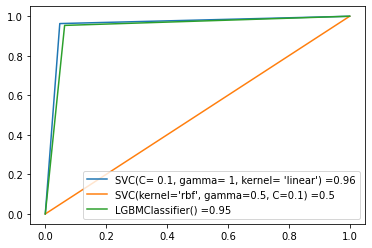

In [ ]:
#Curva ROC y área AUC
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

#set up plotting area
plt.figure(0).clf()

y = y_test
pred = y_pred_1

fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = round(metrics.auc(fpr, tpr),2)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC 2="+str(roc_auc))


y = y_test
pred = y_pred_2

fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = round(metrics.auc(fpr, tpr))
plt.plot(fpr,tpr,label="Gradient Boosting, SVC ="+str(roc_auc))

plt.legend()

In [ ]:
#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

#add legend
plt.legend()

### Métricas utilizando validación cruzada

A continuación, vamos a realizar la misma validación del modelo pero utilizando cross-validation y ofreciendo diferentes métircas por cada iteración. 

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold

#stratified_k_fold = StratifiedKFold(n_splits=3,shuffle=True) 
stratified_k_fold = KFold(n_splits=5)


for m in models:
  scores = cross_validate(m, X, y, cv=stratified_k_fold, scoring=['accuracy', 'precision', 'recall', 'f1_weighted', 'roc_auc'])
  print("Exactitud: " + str(scores['test_accuracy'].mean()))
  print("Precision: " + str(scores['test_precision'].mean()))
  print("Recall: " + str(scores['test_recall'].mean()))
  print("ROC AUC: " + str(scores['test_roc_auc'].mean()))
  print("Valor-F: " + str(scores['test_f1_weighted'].mean()))
  print()



Exactitud: 0.9455053563111318
Precision: 0.9372100115572616
Recall: 0.9733684472426866
ROC AUC: 0.9931575260930332
Valor-F: 0.9460183497622836

Exactitud: 0.6276665114112715
Precision: 0.6276665114112715
Recall: 1.0
ROC AUC: 0.5432556926868595
Valor-F: 0.49278054630707613

Exactitud: 0.9631113181183046
Precision: 0.9509954301636491
Recall: 0.983271667333754
ROC AUC: 0.9944960338332454
Valor-F: 0.9632009693700517

